<a href="https://colab.research.google.com/github/xhxuciedu/CS206/blob/master/GMRES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import scipy.sparse.linalg as spla
import numpy as np
from scipy import sparse
import scipy.linalg as la
import matplotlib.pyplot as plt

In [82]:
n = 300
B = np.random.randn(n, n)/np.sqrt(n)

Text(0.5, 1.0, 'Eigenvalues of random matrix')

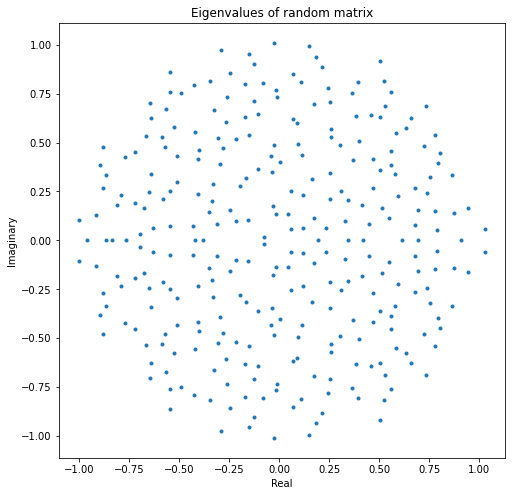

In [83]:
eigvals = la.eigvals(B)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(eigvals.real, eigvals.imag, '.')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_title('Eigenvalues of random matrix')

In [84]:
b = np.random.rand(300)
A = B + 2*np.identity(n)

In [87]:
x, info = spla.gmres(A, b)
print(info)

0


In [88]:
la.norm((A @ x) - b)

9.307580798207187e-05

In [93]:
# Restart after 100 iterations.
x, info = spla.gmres(A, b, restart=100)
info
la.norm((A @ x) - b)

9.307580798207187e-05

## GMRES
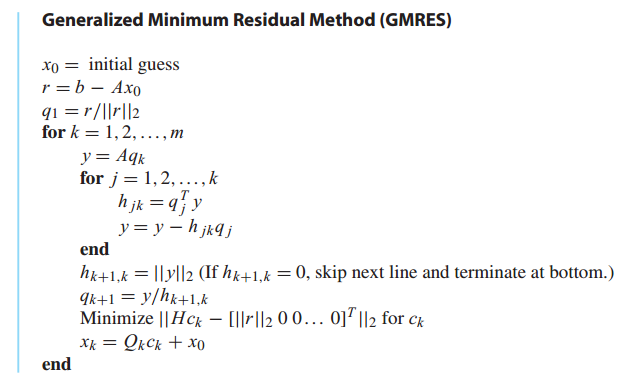

In [40]:
def GMRes(A, b, x0, e, nmax_iter, restart=None):
    r = b - np.asarray(np.dot(A, x0)).reshape(-1)

    x = []
    q = [0] * (nmax_iter)


    q[0] = r / np.linalg.norm(r)
    h = np.zeros((nmax_iter + 1, nmax_iter))

    for k in range(nmax_iter):
        y = np.asarray(np.dot(A, q[k])).reshape(-1)

        for j in range(k):
            h[j, k] = np.dot(q[j], y)
            y = y - h[j, k] * q[j]
        h[k + 1, k] = np.linalg.norm(y)
        if (h[k + 1, k] != 0 and k != nmax_iter - 1):
            q[k + 1] = y / h[k + 1, k]

        b = np.zeros(nmax_iter + 1)
        b[0] = np.linalg.norm(r)

        result = np.linalg.lstsq(h, b)[0]

        x.append(np.dot(np.asarray(q).transpose(), result) + x0)

    return x

In [99]:
#x0 = np.random.rand(len(b))
x0 = np.zeros_like(b)

In [100]:
x = GMRes(A, b, x0, 1e-6,200)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [101]:
la.norm(A@x[-1]-b)

0.6458351217451643